# Task 1 - Data Preparation
For this task, you will perform the following steps:
- Load all the necessary packages for this exercise
- Load the data
- Split the data into input features and the target variable
- Split the data into training and validation datasets

In [1]:
# Import 'numpy' and 'pandas' to work with numbers and dataframes
import numpy as np
import pandas as pd

# Import 'matplotlib.pyplot' for visualizations
from matplotlib import pyplot as plt
import seaborn as sns

# Import method for train-validation split
from sklearn.model_selection import train_test_split

# Import methods for building decision trees
from sklearn.tree import DecisionTreeClassifier

# Importing packages for building ensemble models
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

# Import 'GridSearchCV' for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Import suitable performance metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_score, precision_recall_curve, f1_score

In [2]:
# Load the data and take a look at it
# Note: Make sure that the data is in the same folder as the Jupyter notebook or specify the address correctly
churndata = pd.read_csv('churndata_DT.csv', index_col = 'customerID')
churndata.head(2)

,TotalCharges,MonthlyCharges,tenure,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,PhoneService_No,PhoneService_Yes,Churn
customerID,,,,,,,,,,,,,,,,,,,,,
4837-PZTIC,1875.25,41.90,47,0,0,1,1,0,0,0,...,1,0,0,1,0,1,0,1,0,0
6507-ZJSUR,2117.25,90.45,23,1,0,0,0,1,0,0,...,0,1,0,0,1,0,1,0,1,0


In [3]:
# Split the data into input features and the target variable
# Note: The target variable here is the 'Churn' feature
X = churndata.drop('Churn',axis=1)
y = churndata['Churn']

In [4]:
# Split the data into training and validation datasets using the 'train_test_split' method
# Hint: Study the documentation of the 'train_test_split' method
# Note: Use 'test_size = 0.3' and 'random_state = 0'
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3,random_state=0)

# Task 2 - Building Classification Models
For this task, you will perform the following steps:

- Part 1
  - Build and analyze a random forest model for the data with:
    - Default parameters
    - Hyperparameter tuning using *GridSearchCV()* on:
        - n_estimators
        - combination of n_estimators and max_depth

- Part 2
  - Build and analyze a LightGBM model for the data with:
    - Default parameters
    - Hyperparameter tuning using *GridSearchCV()* on combination of n_estimators, max_depth and learning_rate

- Part 3
  - Build and analyze a decision tree model for the data pruned using the *ccp_alpha* parameter
    - The best *ccp_alpha* parameter has been provided to you for this exercise

## Part 1 - Random Forest Models

### Sub-task 1 - Random Forest Model - I

For this sub-task, you will perform the following steps:
- Build a random forest model for the data using the *RandomForestClassifier()* method with the default parameters
- Visualize the confusion matrices for the training and validation sets

In [5]:
# Create a random forest classifier for the data using the 'RandomForestClassifier()' method
# Hint: Study the documentation of the 'RandomForestClassifier()' method
# Note: Use the default values for all parameters
# Note: Use 'random_state = 0'
rf1 = RandomForestClassifier(random_state=0)
rf1 = rf1.fit(X_train,y_train)

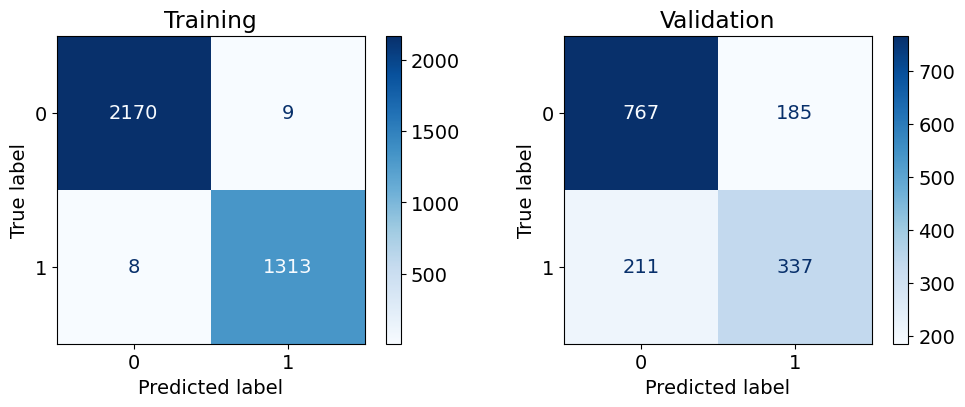

In [6]:
# Display the confusion matrices for 'rf1' on the training and validation data
# Hint: Study the documentation of the 'ConfusionMatrixDisplay.from_estimator()' method
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ConfusionMatrixDisplay.from_estimator(rf1, X_train, y_train, cmap = plt.cm.Blues, ax = ax[0])
ConfusionMatrixDisplay.from_estimator(rf1, X_val, y_val, cmap = plt.cm.Blues, ax = ax[1])
ax[0].set_title('Training')
ax[1].set_title('Validation');

### Sub-task 2 - Random Forest Model - II
For this sub-task, you will perform the following steps:
- Build a random forest model for the data using the *RandomForestClassifier()* method and tune it on the number of estimators parameter using the *GridSearchCV()* method
- Visualize the confusion matrices for the training and validation sets

In [7]:
# Initialize a basic random forest object using the 'RandomForestClassifier()' method
# Hint: Study the documentation of the 'RandomForestClassifier()' method
# Note: Use 'random_state = 0'
base_rf_model = RandomForestClassifier(random_state=0)

# Define the range of the 'n_estimators' parameter and store it in a parameter grid dictionary
parameters_grid = {'n_estimators': np.arange(50, 300, 50)}

# Perform a grid search using the 'GridSearchCV()' method to obtain a grid on which to fit the training data
# Hint: Study the documentation of the 'GridSearchCV()' method
# Hint: The 'estimator' parameter should be set to the base random forest model on which tuning is to be performed
# Hint: The 'param_grid' parameter should be set to the grid of parameters on which tuning is to be performed
# Note: Use 'scoring = roc_auc' and 'cv = 2'
grid = GridSearchCV(estimator=base_rf_model,param_grid=parameters_grid,scoring='roc_auc',cv=2)

# Train a model using the training data
# Note: Execution times for grid searches are exponentially proportional to the number of hyperparameters being tuned for
# Note: This cell might take a few minutes to run
rf2 = grid.fit(X_train,y_train)

In [8]:
# Print the optimal value of 'n_estimators' obtained from 'rf2'
# Hint: Use the 'best_params_' attribute of the 'rf2' object and look for 'n_estimators'
best_n_estimators = rf2.best_params_

print('The optimal value of n_estimators is', best_n_estimators)

The optimal value of n_estimators is {'n_estimators': 250}


In [ ]:
# Display the confusion matrices for 'rf2' on the training and validation data
# Hint: Study the documentation of the 'ConfusionMatrixDisplay.from_estimator()' method
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ConfusionMatrixDisplay.from_estimator(rf2, X_train, y_train, cmap = plt.cm.Blues, ax = ax[0])
ConfusionMatrixDisplay.from_estimator(rf2, X_val, y_val, cmap = plt.cm.Blues, ax = ax[1])
ax[0].set_title('Training')
ax[1].set_title('Validation');

### Sub-task 3 - Random Forest Model - III
For this sub-task, you will perform the following steps:
- Build a random forest model for the data using the *RandomForestClassifier()* method and tune it on the number of estimators and the maximum tree depth parameters using the *GridSearchCV()* method
- Visualize the confusion matrices for the training and validation sets

In [9]:
# Initialize a basic random forest object using the 'RandomForestClassifier()' method
# Hint: Study the documentation of the 'RandomForestClassifier()' method
# Note: Use 'random_state = 0'
base_rf_model = RandomForestClassifier(random_state=0)

# Define the range of the 'n_estimators' and the 'max_depth' parameters and store them in a parameter grid dictionary
parameters_grid = {'n_estimators': np.arange(50, 300, 50), 'max_depth': np.arange(2, 8, 1)}

# Perform a grid search using the 'GridSearchCV()' method to obtain a grid on which to fit the training data
# Hint: Study the documentation of the 'GridSearchCV()' method
# Hint: The 'estimator' parameter should be set to the base random forest model on which tuning is to be performed
# Hint: The 'param_grid' parameter should be set to the grid of parameters on which tuning is to be performed
# Note: Use 'scoring = roc_auc' and 'cv = 2'
grid = GridSearchCV(estimator=base_rf_model,param_grid=parameters_grid,scoring='roc_auc',cv=2)

# Train a model using the training data
# Note: Execution times for grid searches are exponentially proportional to the number of hyperparameters being tuned for
# Note: This cell might take a few minutes to run
rf3 = grid.fit(X_train,y_train)

In [10]:
# Print the optimal value of 'n_estimators' and 'max_depth' obtained from 'rf3'
# Hint: Use the 'best_params_' attribute of the 'rf3' object and look for 'n_estimators' and 'max_depth'
best_n_estimators = rf3.best_params_['n_estimators']
best_max_depth = rf3.best_params_['max_depth']

print('The optimal value of n_estimators is', best_n_estimators)
print('The optimal value of max_depth is', best_max_depth)

The optimal value of n_estimators is 250
The optimal value of max_depth is 6


In [ ]:
# Display the confusion matrices for 'rf3' on the training and validation data
# Hint: Study the documentation of the 'ConfusionMatrixDisplay.from_estimator()' method
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ConfusionMatrixDisplay.from_estimator(rf3, X_train, y_train, cmap = plt.cm.Blues, ax = ax[0])
ConfusionMatrixDisplay.from_estimator(rf3, X_val, y_val, cmap = plt.cm.Blues, ax = ax[1])
ax[0].set_title('Training')
ax[1].set_title('Validation');

## Part 2 - Gradient Boosted Tree Models
### Sub-task 1 - Gradient Boosted Tree Model - I
For this sub-task, you will perform the following steps:
- Build a gradient boosted tree model for the data using the *LGBMClassifier()* method with the default parameters
- Visualize the confusion matrices for the training and validation sets

In [11]:
# Create a gradient boosted tree classifier for the data using the 'LGBMClassifier()' method
# Hint: Study the documentation of the 'LGBMClassifier()' method
# Note: Use the default values for all parameters
# Note: Use 'random_state = 0'
gbt1 = LGBMClassifier(random_state=0)
gbt1 = gbt1.fit(X_train,y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1321, number of negative: 2179
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000831 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 619
[LightGBM] [Info] Number of data points in the train set: 3500, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377429 -> initscore=-0.500477
[LightGBM] [Info] Start training from score -0.500477


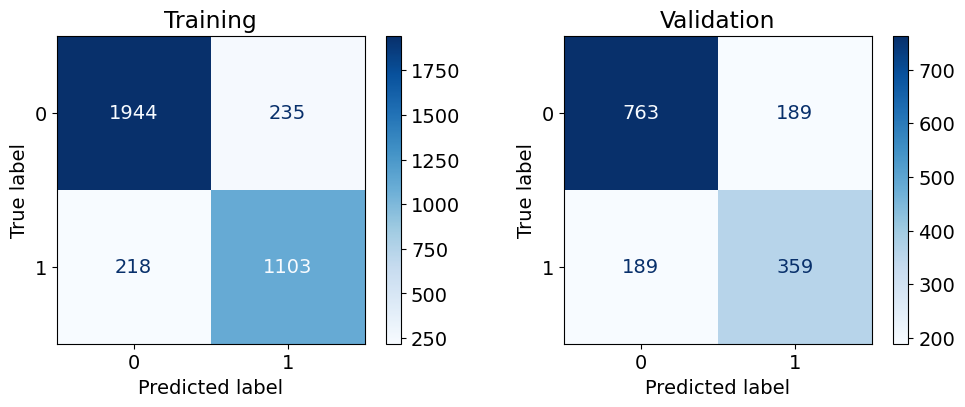

In [12]:
# Display the confusion matrices for 'gbt1' on the training and validation data
# Hint: Study the documentation of the 'ConfusionMatrixDisplay.from_estimator()' method
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ConfusionMatrixDisplay.from_estimator(gbt1, X_train, y_train, cmap = plt.cm.Blues, ax = ax[0])
ConfusionMatrixDisplay.from_estimator(gbt1, X_val, y_val, cmap = plt.cm.Blues, ax = ax[1])
ax[0].set_title('Training')
ax[1].set_title('Validation');

### Sub-task 2 - Gradient Boosted Tree Model - II
For this sub-task, you will perform the following steps:
- Build a gradient boosted tree model for the data using the *LGBMClassifier()* method and tune it on the number of estimators, maximum tree depth and learning rate parameters using the *GridSearchCV()* method
- Visualize the confusion matrices for the training and validation sets

In [13]:
# Initialize a basic gradient boosted tree object using the 'LGBMClassifier()' method
# Hint: Study the documentation of the 'LGBMClassifier()' method
# Note: Use 'random_state = 0'
base_gbt_model = LGBMClassifier(random_state=0)

# Define the range of the 'n_estimators', the 'max_depth' and the 'learning_rate' parameters and store them in a parameter grid dictionary
parameters_grid = {'n_estimators': np.arange(50, 300, 50),
                   'max_depth': np.arange(2, 8, 1),
                   'learning_rate': np.arange(0.005, 0.03, 0.005)}

# Perform a grid search using the 'GridSearchCV()' method to obtain a grid on which to fit the training data
# Hint: Study the documentation of the 'GridSearchCV()' method
# Hint: The 'estimator' parameter should be set to the base gradient boosted tree model on which tuning is to be performed
# Hint: The 'param_grid' parameter should be set to the grid of parameters on which tuning is to be performed
# Note: Use 'scoring = roc_auc' and 'cv = 2'
grid = GridSearchCV(estimator=base_gbt_model,param_grid=parameters_grid,scoring='roc_auc',cv=2)

# Train a model using the training data
# Note: Execution times for grid searches are exponentially proportional to the number of hyperparameters being tuned for
# Note: This cell might take a few minutes to run
gbt2 = grid.fit(X_train,y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 660, number of negative: 1090
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000242 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 619
[LightGBM] [Info] Number of data points in the train set: 1750, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377143 -> initscore=-0.501693
[LightGBM] [Info] Start training from score -0.501693
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 661, number of negative: 1089
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=

In [15]:
# Print the optimal value of 'n_estimators', 'max_depth' and 'learning_rate' obtained from 'gbt2'
# Hint: Use the 'best_params_' attribute of the 'gbt2' object and look for 'n_estimators', 'max_depth' and 'learning_rate'
best_n_estimators = gbt2.best_params_['n_estimators']
best_max_depth = gbt2.best_params_['max_depth']
best_learning_rate = gbt2.best_params_['learning_rate']

print('The optimal value of n_estimators is', best_n_estimators)
print('The optimal value of learning_rate is', best_learning_rate)
print('The optimal value of max_depth is', best_max_depth)

The optimal value of n_estimators is 150
The optimal value of learning_rate is 0.02
The optimal value of max_depth is 3


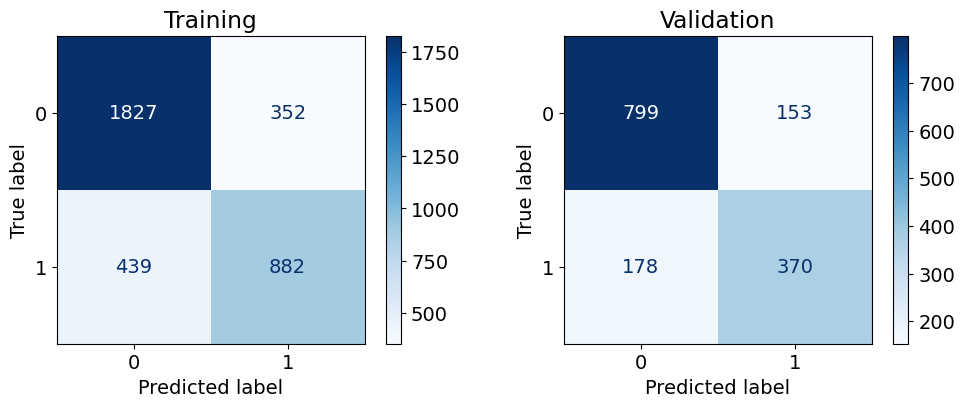

In [16]:
# Display the confusion matrices for 'gbt2' on the training and validation data
# Hint: Study the documentation of the 'ConfusionMatrixDisplay.from_estimator()' method
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ConfusionMatrixDisplay.from_estimator(gbt2, X_train, y_train, cmap = plt.cm.Blues, ax = ax[0])
ConfusionMatrixDisplay.from_estimator(gbt2, X_val, y_val, cmap = plt.cm.Blues, ax = ax[1])
ax[0].set_title('Training')
ax[1].set_title('Validation');

## Part 3 - Decision Tree Model
For this task, you will build a decision tree model for the data using the *DecisionTreeClassifier()* method and prune it using the *ccp_alpha* parameter. Note that the optimal value of *ccp_alpha* for this data set is provided to you for this exercise.

In [18]:
# Train a decision tree model on the training data using the 'DecisionTreeClassifier()' method with the best 'ccp_alpha' value
# Hint: Study the documentation of the 'DecisionTreeClassifier()' method
# Hint: The optimal value of 'ccp_alpha' for the data is 0.0018
# Note: Use 'random_state = 0'
DT = DecisionTreeClassifier(random_state=0,ccp_alpha=0.0018)
DT = DT.fit(X_train,y_train)

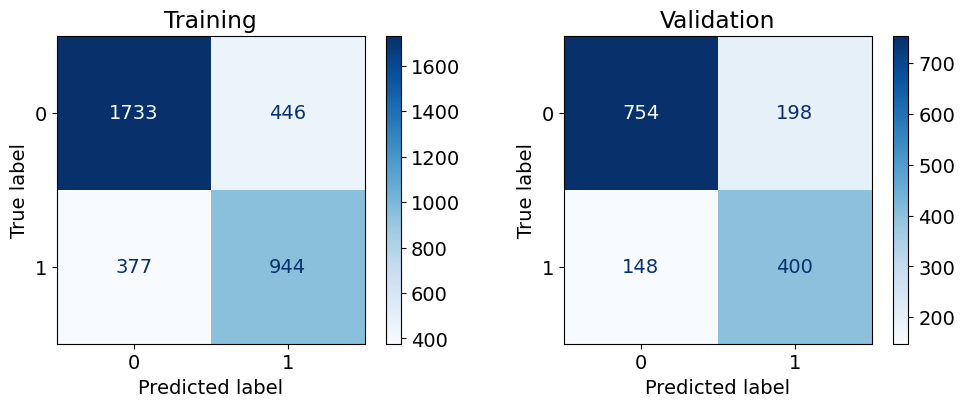

In [19]:
# Display the confusion matrices for 'DT' on the training and validation data
# Hint: Study the documentation of the 'ConfusionMatrixDisplay.from_estimator()' method
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ConfusionMatrixDisplay.from_estimator(DT, X_train, y_train, cmap = plt.cm.Blues, ax = ax[0])
ConfusionMatrixDisplay.from_estimator(DT, X_val, y_val, cmap = plt.cm.Blues, ax = ax[1])
ax[0].set_title('Training')
ax[1].set_title('Validation');

# Task 3 - Comparing the Models
For this task, you will perform the following steps:
- Compare various classification performance metrics for the six tree models that you have built
- Compare the ROC curves for these six models

In [21]:
# Calculate and print various classification performance measures for all the models on the training and validation data
# Hint: You will need to obtain the predicted class labels for each of the models using the 'predict()' method
# Hint: You will need to obtain the predicted probabilities for each of the models using the 'predict_proba()' method

# Hint: Study the documentations of the different peformance metrics methods
# Note: For sensitivity, precision, and F1 score, specify the 'pos_label' parameter as '1' or leave it at the default value
# Note: For specificity, specify the 'pos_label' parameter as '0'

# Compute predicted probabilities and class labels for each of the models on the training and validation data
# Hint: The second column of the matrix returned by the 'predict_proba()' method contains the positive class probabilities

models = [rf1, rf2, rf3, gbt1, gbt2, DT]
modelnames = ['rf1', 'rf2', 'rf3', 'gbt1', 'gbt2', 'DT']

train_probabilities = [None] * len(models)
val_probabilities = [None] * len(models)
train_y_pred = [None] * len(models)
val_y_pred = [None] * len(models)

i = -1
for model in models:
    i = i + 1
    train_probabilities[i] = models[i].predict_proba(X_train)[:,1]
    val_probabilities[i] = models[i].predict_proba(X_val)[:,1]
    train_y_pred[i] = models[i].predict(X_train)
    val_y_pred[i] = models[i].predict(X_val)

# Use the predicted class labels to compute the following performance metrics

# Compute the accuracies
train_acc = [None] * len(models)
val_acc = [None] * len(models)
for i in np.arange(0, len(models), 1):
    train_acc[i] = accuracy_score(y_train,train_y_pred[i])
    val_acc[i] = accuracy_score(y_val,val_y_pred[i])

# Compute the sensitivities
train_sens = [None] * len(models)
val_sens = [None] * len(models)
for i in np.arange(0, len(models), 1):
    train_sens[i] = recall_score(y_train,train_y_pred[i])
    val_sens[i] = recall_score(y_val,val_y_pred[i])

# Compute the specificities
train_spec = [None] * len(models)
val_spec = [None] * len(models)
for i in np.arange(0, len(models), 1):
    train_spec[i] = recall_score(y_train,train_y_pred[i])
    val_spec[i] = recall_score(y_val,val_y_pred[i])

# Compute the precisions
train_prec = [None] * len(models)
val_prec = [None] * len(models)
for i in np.arange(0, len(models), 1):
    train_prec[i] = precision_score(y_val,val_y_pred[i])
    val_prec[i] = precision_score(y_val,val_y_pred[i])

# Compute the F1 scores
train_f1 = [None] * len(models)
val_f1 = [None] * len(models)
for i in np.arange(0, len(models), 1):
    train_f1[i] = f1_score(y_train,train_y_pred[i])
    val_f1[i] = f1_score(y_val,val_y_pred[i])

# Use the predicted probabilities to compute the ROC AUC scores

# Compute the ROC AUC scores
train_auc = [None] * len(models)
val_auc = [None] * len(models)
for i in np.arange(0, len(models), 1):
    train_auc[i] = roc_auc_score(y_train,train_probabilities[i])
    val_auc[i] = roc_auc_score(y_val,val_probabilities[i])

# Summarize the above metrics for all the models using a single data frame and display it
modelcompare = pd.DataFrame(data = {'Training Accuracy': train_acc,
                                    'Validation Accuracy': val_acc,
                                    'Training Sensitivity': train_sens,
                                    'Validation Sensitivity': val_sens,
                                    'Training Specificity': train_spec,
                                    'Validation Specificity': val_spec,
                                    'Training Precision': train_prec,
                                    'Validation Precision': val_prec,
                                    'Training F1 Score': train_f1,
                                    'Validation F1 Score': val_f1,
                                    'Training ROC AUC Score': train_auc,
                                    'Validation ROC AUC Score': val_auc},
                            index = modelnames)

modelcompare

,Training Accuracy,Validation Accuracy,Training Sensitivity,Validation Sensitivity,Training Specificity,Validation Specificity,Training Precision,Validation Precision,Training F1 Score,Validation F1 Score,Training ROC AUC Score,Validation ROC AUC Score
rf1,0.995143,0.736000,0.993944,0.614964,0.993944,0.614964,0.645594,0.645594,0.993568,0.629907,0.999783,0.808536
rf2,0.995429,0.740667,0.993944,0.616788,0.993944,0.616788,0.653772,0.653772,0.993944,0.634742,0.999878,0.809170
rf3,0.781714,0.778667,0.708554,0.691606,0.708554,0.691606,0.699262,0.699262,0.710167,0.695413,0.868968,0.851315
gbt1,0.870571,0.748000,0.834974,0.655109,0.834974,0.655109,0.655109,0.655109,0.829635,0.655109,0.949329,0.830383
gbt2,0.774000,0.779333,0.667676,0.675182,0.667676,0.675182,0.707457,0.707457,0.690411,0.690943,0.853683,0.848831
DT,0.764857,0.769333,0.714610,0.729927,0.714610,0.729927,0.668896,0.668896,0.696422,0.698080,0.828393,0.826766


/var/folders/4m/v0ccrbyx4kg084v_gv4m4nr00000gn/T/ipykernel_2747/623917864.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = train_1_spec[i], y = train_sens[i], color = colorlist[i], label = '_nolegend_', ci = None)
/var/folders/4m/v0ccrbyx4kg084v_gv4m4nr00000gn/T/ipykernel_2747/623917864.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = train_1_spec[i], y = train_sens[i], color = colorlist[i], label = '_nolegend_', ci = None)
/var/folders/4m/v0ccrbyx4kg084v_gv4m4nr00000gn/T/ipykernel_2747/623917864.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = train_1_spec[i], y = train_sens[i], color = colorlist[i], label = '_nolegend_', ci = None)
/var/folders/4m/v0ccrbyx4kg084v_gv4m4nr00000gn/T/ipykernel_2747/623917864.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=No

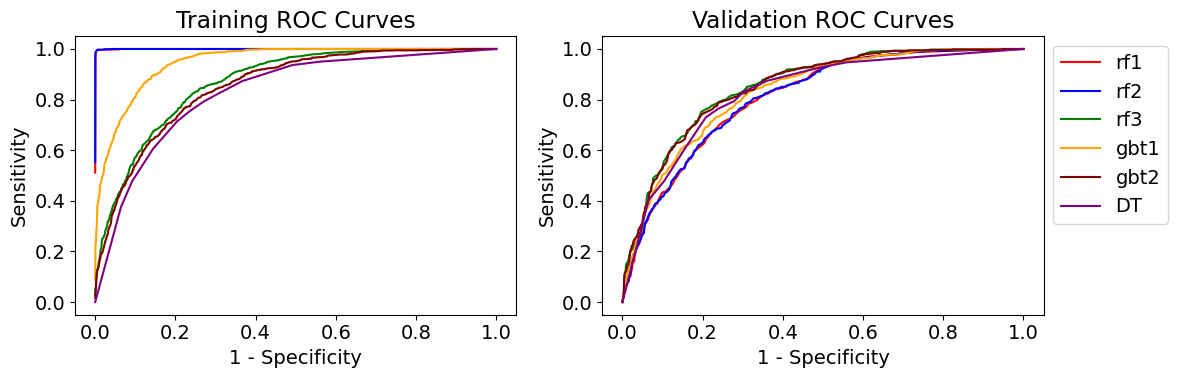

In [22]:
# Compare the ROC curves of the models on the training and validation data

# Obtain the values for (1 - specificity) and sensitivity for the training and validation data using the 'roc_curve()' method for all the models
# Hint: Study the documentation of the 'roc_curve()' method
# Note: Specify the 'pos_label' as '1' or leave it at the default value
train_1_spec = [None] * len(models)
train_sens = [None] * len(models)
val_1_spec = [None] * len(models)
val_sens = [None] * len(models)
for i in np.arange(0, len(models), 1):
    train_1_spec[i], train_sens[i], _ = roc_curve(y_train,train_probabilities[i])
    val_1_spec[i], val_sens[i], _ = roc_curve(y_val,val_probabilities[i])

# Plot the ROC curves for all the models for the training and the validation data
plt.figure(figsize = (12, 4))
colorlist = ['red', 'blue', 'green', 'orange', 'maroon', 'purple']

plt.subplot(1, 2, 1)
for i in np.arange(0, len(models), 1):
    sns.lineplot(x = train_1_spec[i], y = train_sens[i], color = colorlist[i], label = '_nolegend_', ci = None)
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('Training ROC Curves')

plt.subplot(1, 2, 2)
for i in np.arange(0, len(models), 1):
    sns.lineplot(x = val_1_spec[i], y = val_sens[i], color = colorlist[i], label = modelnames[i], ci = None)
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('Validation ROC Curves')
plt.legend(bbox_to_anchor = [1, 1])

plt.tight_layout();

# Task 4 - Misclassification Costs of Suitable Model
For this task, you will perform the following steps:
- Select a model based on their classification performance measures
- Compute the baseline misclassification cost
- Observe how the misclassification cost varies as the cut-off for classification is increased
- Obtain the best misclassification cost and the associated cut-off from the training data
- Compute the potentially best misclassification cost of the model using the validation data

Note: Suppose that the problem statement requires that your classification model satisfies the following conditions:
- The absolute value of the difference between the training and the validation accuracies is less than 0.1
- The validation accuracy is greater than 0.75
- The absolute value of the difference between the training and the validation ROC AUC scores is less than 0.1
- The validation ROC AUC score is greater than 0.75
- The validation sensitivity is greater than 0.65
- The validation precision is greater than 0.7
- The validation F1 score is greater than 0.65

In [25]:
# Using the conditions on the performance measures as given above, select the best model
# Hint: Use the 'modelcompare' data frame that you created to obtain the name of the best model
best_model_name = modelcompare[
    (modelcompare['Training Accuracy']-modelcompare['Validation Accuracy']<0.1) &
    (modelcompare['Validation Accuracy']>0.75) &
    (modelcompare['Training ROC AUC Score'] - modelcompare['Validation ROC AUC Score'] < 0.1) &
    (modelcompare['Validation ROC AUC Score'] > 0.75) &
    (modelcompare['Validation Sensitivity'] > 0.65) &
    (modelcompare['Validation Precision'] > 0.7) &
    (modelcompare['Validation F1 Score'] > 0.65)
].index[0]

print('The most suitabel model according to the conditions of the problem statement is "{}".'.format(best_model_name))

The most suitabel model according to the conditions of the problem statement is "gbt2".


In [ ]:
# Declare the cost of false positives and false negatives
# Note: The cost of false positives and false negatives are provided to you for this exercise
# Note: Labeling a 'not churn' customer as 'churn' leads to a few follow up phone calls only, so its cost is less
# Note: Labeling a 'churn' customer as 'not churn' may lead to the loss of that customer, so its cost is more
fp_cost = 50
fn_cost = 100
print('The cost of classifying a person as churn when they are not a churn = {} dollars'.format(fp_cost))
print('The cost of classifying a person as not churn when they are a churn = {} dollars'.format(fn_cost))

In [ ]:
# Calculate the misclassification cost for the naive model on the training and the validation data
# Hint: The naive model in this case would classify everyone as a churn or class '1'
# Hint: That means all class '1' people are classified as class '1' accurately
# Hint: The class '0' people are the only ones that contribute to the misclassification
# Hint: So, you need to count how many 'y_train' and 'y_val' values are actually class '0', since all of them are labeled as class '1'
# Hint: Recall the formula for the misclassification cost
train_mc_cost_0 = ########## CODE HERE ##########
val_mc_cost_0 = ########## CODE HERE ##########

In [ ]:
# Print the misclassification cost of classifying everyone as a churn
print('The misclassification cost of classifying everyone in the training data as a churn = {} dollars'.format(train_mc_cost_0))
print('The misclassification cost of classifying everyone in the validation data as a churn = {} dollars'.format(val_mc_cost_0))

In [ ]:
# Obtain the confusion matrices for the selected model using the 'confusion_matrix()' method for the training and the validation data
# Hint: Study the documentation of the 'confusion_matrix()' method
train_cf = confusion_matrix(########## CODE HERE ##########)
val_cf = confusion_matrix(########## CODE HERE ##########)

# Obtain the number of false positives and false negatives from the confusion matrices 'train_cf' and 'val_cf'
# Hint: Study the documentation of the 'confusion_matrix()' method
train_fp_count = ########## CODE HERE ##########
train_fn_count = ########## CODE HERE ##########
val_fp_count = ########## CODE HERE ##########
val_fn_count = ########## CODE HERE ##########

# Calculate and print the misclassification costs for the selected model for the training and the validation datasets
# Hint: Recall the formula for the misclassification cost
train_mc_cost = ########## CODE HERE ##########
val_mc_cost = ########## CODE HERE ##########
print('The misclassification cost on the training data of using the selected model with default cut-off = {} dollars'.format(train_mc_cost))
print('The misclassification cost on the validation data of using the selected model with default cut-off = {} dollars'.format(val_mc_cost))

In [ ]:
# Generate a list of misclassification costs for various cut-off values for the selected model on the training and the validation data
# Hint: If the 'train_probabilities' or the 'val_probabilities' value is greater than the cut-off, then the label is class '1', else it's class '0'
# Hint: Try using the 'np.where()' method to obtain the predictions for each cut-off value
train_mc_cost = []
val_mc_cost = []
cutoffs = np.arange(0, 1, 0.01)
for cutoff in cutoffs:
    train_y_pred_curr = ########## CODE HERE ##########
    train_curr_cf = confusion_matrix(########## CODE HERE ##########)
    train_fp_count = ########## CODE HERE ##########
    train_fn_count = ########## CODE HERE ##########
    train_mc_cost_current = ########## CODE HERE ##########
    train_mc_cost.append(train_mc_cost_current)
    
    val_y_pred_curr = ########## CODE HERE ##########
    val_curr_cf = confusion_matrix(########## CODE HERE ##########)
    val_fp_count = ########## CODE HERE ##########
    val_fn_count = ########## CODE HERE ##########
    val_mc_cost_current = ########## CODE HERE ##########
    val_mc_cost.append(val_mc_cost_current)

In [ ]:
# Plot a graph to show how the misclassification costs vary as the cut-off is increased for the training and the validation data
sns.lineplot(x = cutoffs, y = train_mc_cost, color = 'blue', label = 'Training', ci = None)
sns.lineplot(x = cutoffs, y = val_mc_cost, color = 'red', label = 'Validation', ci = None)
plt.xlabel('Cut-off')
plt.ylabel('Misclassification Cost in dollars')
plt.title('Misclassification Cost for the Model')
plt.legend(bbox_to_anchor = [1, 1]);

In [ ]:
# Obtain and print the best misclassification cost for the selected model on the training data
# Hint: The best misclassification cost would be the minimum cost
train_best_cost = ########## CODE HERE ##########

# Obtain and print the best cut-off cost for the selected model on the training data
# Hint: The best cut-off is the cut-off value for which the misclassification cost is the least
train_best_cutoff = ########## CODE HERE ##########

print('Best classification cut-off probability from the training data for the selected model = {}'.format(train_best_cutoff))
print('Best misclassification cost on the training data for the selected model = {} dollars'.format(train_best_cost))

In [ ]:
# Use the cut-off associated with the best misclassification cost on the training data to get the best cost for the validation data
# Hint: The expected best misclassification cost on the validation data is the cost associated with the best cut-off from the training data
val_best_cost = ########## CODE HERE ##########

print('Best misclassification cost on the validation data for the selected model = {} dollars'.format(val_best_cost))